In [15]:
import numpy as np 
import pandas as pd

In [16]:
books=pd.read_csv('Books.csv')
ratings=pd.read_csv('Ratings.csv')
users=pd.read_csv('Users.csv')

C:\Users\FarahAlArbid\AppData\Local\Temp\ipykernel_10560\775865190.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('Books.csv')


In [17]:
users=users.merge(ratings,on='User-ID')
users.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [18]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [19]:
users['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [20]:
users.pop('Age')

0          18.0
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
1149775     NaN
1149776     NaN
1149777     NaN
1149778     NaN
1149779     NaN
Name: Age, Length: 1149780, dtype: float64

In [21]:
df=books.merge(users,on='ISBN')

In [22]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",0


In [23]:
import pandas as pd

highest_rated_books = df.sort_values(by='Book-Rating', ascending=False)

top_n_books = highest_rated_books.head(10)

print(top_n_books[['Book-Title', 'Book-Rating']])


                                               Book-Title  Book-Rating
162678           What Looks Like Crazy On An Ordinary Day           10
68298             The Power of Myth (Illustrated Edition)           10
359604               Dakota Born (Dakota Trilogy, Book 1)           10
671654  Cold Company : An Alaska Mystery (Alaska Myste...           10
403005                                  Things Fall Apart           10
214722                                      Fool's Puzzle           10
59210                                          Red Dragon           10
529671  The One World, One Heart: Everyone Has the Sam...           10
121724                Number the Stars (Yearling Newbery)           10
856292                              Bad Boys in Black Tie           10


In [24]:
average_ratings = df.groupby('Book-Title')['Book-Rating'].mean().reset_index()

print(average_ratings)

                                               Book-Title  Book-Rating
0        A Light in the Storm: The Civil War Diary of ...     2.250000
1                                   Always Have Popsicles     0.000000
2                    Apple Magic (The Collector's series)     0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...     8.000000
4        Beyond IBM: Leadership Marketing and Finance ...     0.000000
...                                                   ...          ...
241066                                      Ã?Â?lpiraten.     0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.     5.250000
241068                                Ã?Â?sterlich leben.     7.000000
241069                              Ã?Â?stlich der Berge.     2.666667
241070                                  Ã?Â?thique en toc     4.000000

[241071 rows x 2 columns]


In [35]:
top_average = average_ratings.nlargest(20, 'Book-Rating')
print(top_average)


                                            Book-Title  Book-Rating
6                                         Dark Justice         10.0
59                   'California Historical Landmarks'         10.0
64   'Isms: a dictionary of words ending in -ism, -...         10.0
74                   'Round the Corner (Sister Circle)         10.0
119                  006781: Bk.1 Gags De Boule Et Bil         10.0
142  1,000 Makers of the Millennium: The Men and Wo...         10.0
152  1,001 Computer Hints &amp; Tips: An A-To-Z Gui...         10.0
165  1,001 Things Everyone Should Know About Americ...         10.0
168                      1,001 Ways to Save the Planet         10.0
192  10 American History Plays for the Classroom (G...         10.0
199            10 Gebote fÃ?Â¼r anspruchsvolle Frauen.         10.0
223                        10 Real SATs, Third Edition         10.0
224                              10 Real Sats (Serial)         10.0
245  10,000 Ways to Say I Love You: The Biggest 

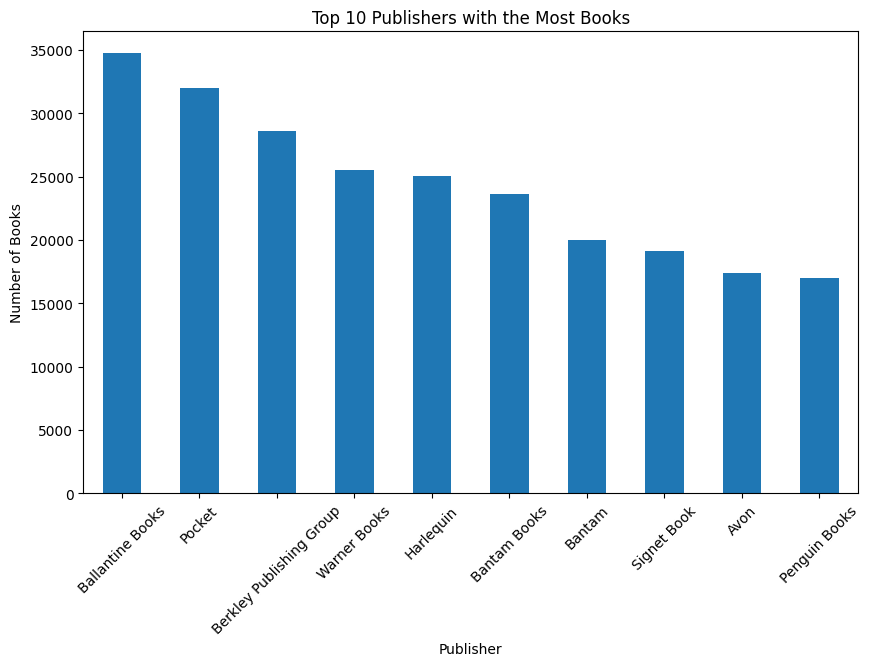

In [41]:
top_publishers = df['Publisher'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers with the Most Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_raters=df[]

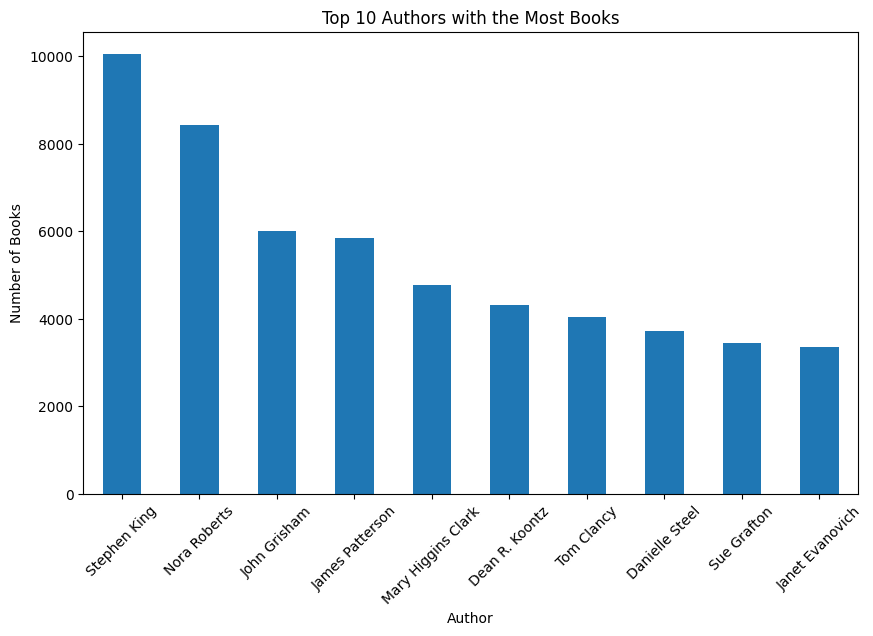

In [42]:
# top 10 Authors with the most books
top_authors = df['Book-Author'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

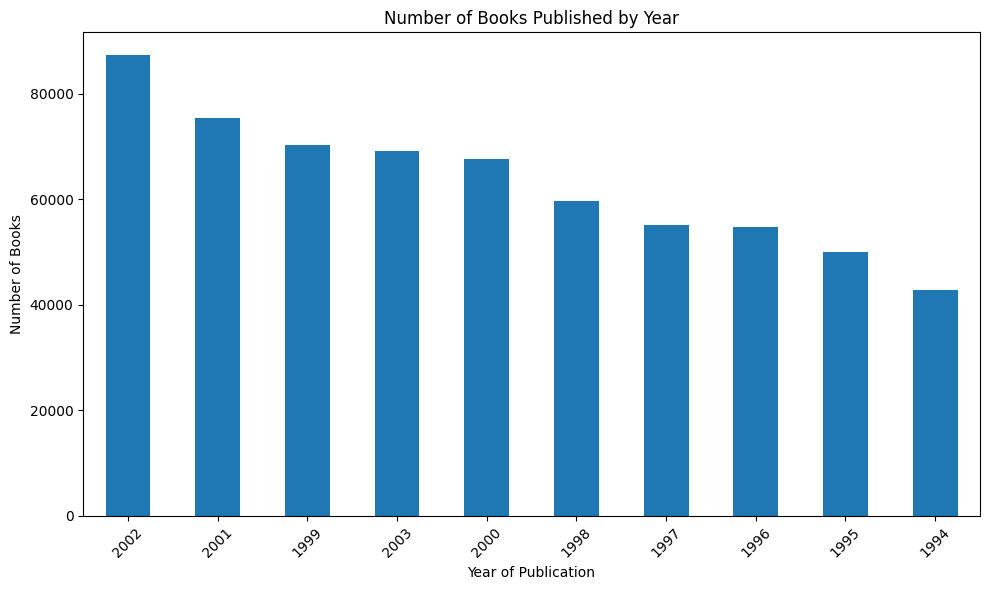

In [43]:
year_counts = df['Year-Of-Publication'].value_counts().sort_values(ascending=False)

top_10_years = year_counts.head(10)

top_10_years.index = top_10_years.index.astype(int)

plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar')
plt.title('Number of Books Published by Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

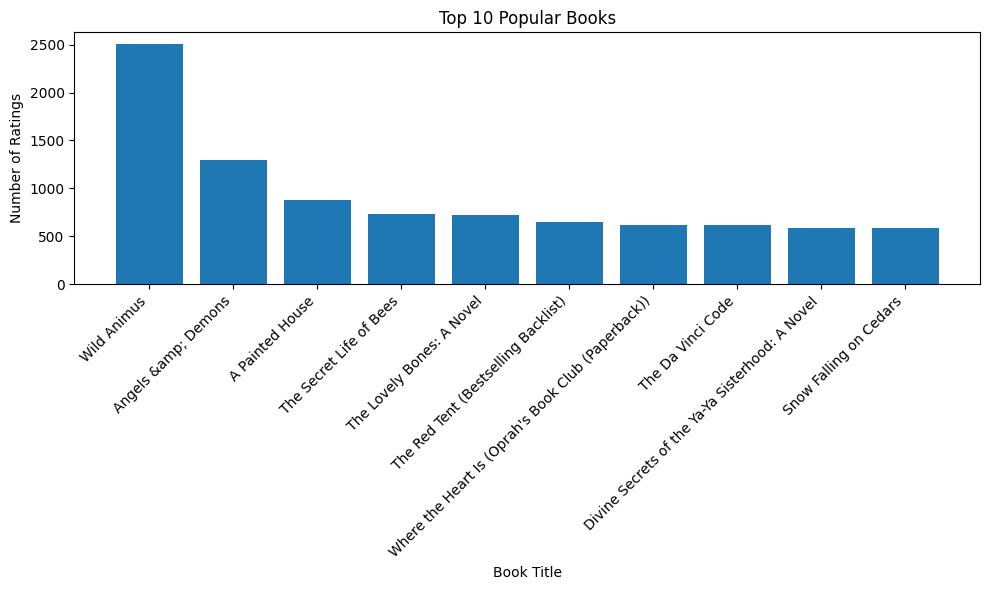

In [44]:


book_ratings_count = df['ISBN'].value_counts().head(10)

top_10_popular_books = books[books['ISBN'].isin(book_ratings_count.index)]

plt.figure(figsize=(10, 6))
plt.bar(top_10_popular_books['Book-Title'], book_ratings_count)
plt.title('Top 10 Popular Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
df.drop(columns=["ISBN","Year-Of-Publication","Image-URL-S","Image-URL-M"],axis=1,inplace=True)
df.drop(index=df[df["Book-Rating"]==0].index,inplace=True)

In [46]:
import re 
df["Book-Title"] = df["Book-Title"].apply(lambda x: re.sub("[\W_]+", " ", x).strip())
df.head()

,Book-Title,Book-Author,Publisher,Image-URL-L,User-ID,Location,Book-Rating
1,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",5
3,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",8
5,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,67544,"toronto, ontario, canada",8
8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,116866,"ottawa, ,",9
9,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,123629,"kingston, ontario, canada",9


In [47]:
new_df=df[df['User-ID'].map(df['User-ID'].value_counts()) > 200] 
users_pivot=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_pivot.fillna(0,inplace=True)

In [48]:
def same_books(book):
    users_vote_film=users_pivot[book]
    similar_with=users_pivot.corrwith(users_vote_film)
    similar_with = pd.DataFrame(similar_with, columns=['correlation'])
    df=similar_with.sort_values('correlation',ascending=False).head(10)
    df_sort=df[df['correlation']>0.8]
    return df_sort

In [52]:
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


book_df_matrix = csr_matrix(users_pivot.values)

def find_similar_books(book_name, num_neighbors=10):
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_df_matrix)
    
    book_index = users_pivot.columns.get_loc(book_name)
    
    distances, indices = model_knn.kneighbors(book_df_matrix[book_index], n_neighbors=num_neighbors+1)
    similar_indices = indices[0][1:]
    
    list_similar_books = [users_pivot.columns[idx] for idx in similar_indices]
    similar_books=pd.DataFrame({"Similar books to":list_similar_books})
    return similar_books

input_book = "10 000 Answers The Ultimate Trivia Encyclopedia"  
find_similar_books(input_book)

,Similar books to
0,1 003 Great Things About Kids
1,101 Most Powerful Proverbs in the Bible 101 Mo...
2,1 2 3 Music
3,101 Dalmatians Escape from De Vil Mansion
4,1999 Novel amp Short Story Writer s Market Nov...
5,100 Ways to Motivate Yourself
6,100 Great Fantasy Short Short Stories
7,20 Hot Potatoes Christians Are Afraid to Touch
8,100 Days of Fun at School
9,2001 a Space Odyssey


In [51]:
def find_favorite_books(User_id, num_books=10):
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_df_matrix)
    
    user_index = users_pivot.index.get_loc(User_id)
    
    distances, indices = model_knn.kneighbors(book_df_matrix[user_index], n_neighbors=num_books+1)
    favorite_indices = indices[0][1:]
    
    list_favorite_books = [users_pivot.columns[idx] for idx in favorite_indices]
    favorite_books=pd.DataFrame({"favorite books ":list_favorite_books})
    return favorite_books

User_id= 13552  
find_favorite_books(User_id)

,favorite books
0,101 Reykjavik
1,101 Most Powerful Proverbs in the Bible 101 Mo...
2,16 Lighthouse Road
3,101 Silly Summertime Jokes
4,100 hikes in the South Cascades and Olympics
5,117 Days Adrift World of Cruising
6,10 000 Answers The Ultimate Trivia Encyclopedia
7,13 99 Euros
8,1 003 Great Things About Kids
9,1066 The Year of the Conquest
